In [203]:
import pandas as pd
import numpy as np
import seaborn as sns

In [80]:
(
 pd.read_csv("day2.example", sep=' ', header=None)
 .assign(increasing=lambda x: [x.loc(axis=0)[i].is_monotonic_increasing for i in x.index])
 .assign(decreasing=lambda x: [x.loc(axis=0)[i].is_monotonic_decreasing for i in x.index])
 .assign(diff_min= lambda x: [abs(x.loc(axis=0)[i].iloc[0:5].diff().min()) for i in x.index])
 .assign(diff_max= lambda x: [abs(x.loc(axis=0)[i].iloc[0:5].diff().max()) for i in x.index])
 .assign(diff_zero= lambda x: [sum(x.loc(axis=0)[i].iloc[0:5].diff() == 0) for i in x.index])
 .assign(max_diff_3= lambda x: [x.loc(axis=0)[i][['diff_min','diff_max']].gt(3).sum() for i in x.index])
 .assign(is_safe= lambda x: [x.loc(axis=0)[i][['increasing','decreasing','max_diff_3','diff_zero']].sum() == 1 for i in x.index])
)

,0,1,2,3,4,increasing,decreasing,diff_min,diff_max,diff_zero,max_diff_3,is_safe
0,7,6,4,2,1,False,True,2,1,0,0,True
1,1,2,7,8,9,True,False,1,5,0,1,False
2,9,7,6,2,1,False,True,4,1,0,1,False
3,1,3,2,4,5,False,False,1,2,0,0,False
4,8,6,4,4,1,False,True,3,0,1,0,False
5,1,3,6,7,9,True,False,1,3,0,0,True


In [173]:
(
 pd.read_csv("day2.input", sep=' ', header=None, names=[0,1,2,3,4,5,6,7])
 .assign(increasing=lambda x: [x.loc(axis=0)[i].dropna().is_monotonic_increasing for i in x.index])
 .assign(decreasing=lambda x: [x.loc(axis=0)[i].dropna().is_monotonic_decreasing for i in x.index])
 .assign(diff_min= lambda x: [min(abs((x.loc(axis=0)[i].iloc[0:8].dropna().diff().dropna().values))) for i in x.index])
 .assign(diff_max= lambda x: [max(abs((x.loc(axis=0)[i].iloc[0:8].dropna().diff().dropna().values))) for i in x.index])
 .assign(max_diff_3= lambda x: [x.loc(axis=0)[i][['diff_min','diff_max']].gt(3).sum() for i in x.index])
 .assign(is_safe= lambda x: x
         .query("(increasing == True | decreasing == True)")
         .query("(diff_min != 0) & (max_diff_3 == 0)")
         .assign(dummie=1)
         .dummie)
).is_safe.sum()

np.float64(402.0)

In [196]:
def safety_check(df):
    checked = []
    for i in df.iloc[0:8].columns:
        checked.append(
            df
            .drop(i, axis=1)
            .assign(increasing=lambda x: [x.loc(axis=0)[i].dropna().is_monotonic_increasing for i in x.index])
            .assign(decreasing=lambda x: [x.loc(axis=0)[i].dropna().is_monotonic_decreasing for i in x.index])
            .assign(diff_min= lambda x: [min(abs((x.loc(axis=0)[i].iloc[0:7].dropna().diff().dropna().values))) for i in x.index])
            .assign(diff_max= lambda x: [max(abs((x.loc(axis=0)[i].iloc[0:7].dropna().diff().dropna().values))) for i in x.index])
            .assign(max_diff_3= lambda x: [x.loc(axis=0)[i][['diff_min','diff_max']].gt(3).sum() for i in x.index])
            .assign(**{f"is_safe_{i}": lambda x: x
                    .query("(increasing == True | decreasing == True)")
                    .query("(diff_min != 0) & (max_diff_3 == 0)")
                    .assign(dummie=1)
                    .dummie})
            [f"is_safe_{i}"]
        )
        print (len(checked))
    return pd.concat(checked, axis=1)

df_checked = safety_check(pd.read_csv("day2.input", sep=' ', header=None, names=[0,1,2,3,4,5,6,7]))
df_checked.head()

1
2
3
4
5
6
7
8


,is_safe_0,is_safe_1,is_safe_2,is_safe_3,is_safe_4,is_safe_5,is_safe_6,is_safe_7
0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [201]:
(df_checked
 .assign(buffered_safe=lambda x: x.sum(axis=1) > 0)
 .buffered_safe
 .sum()
)

np.int64(455)

<Axes: >

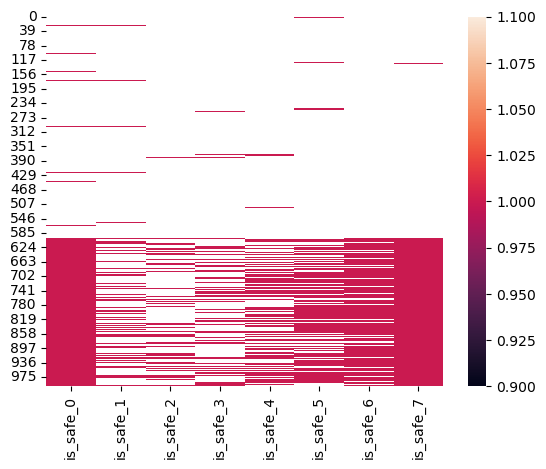

In [204]:
sns.heatmap(df_checked)